Random Forest & Decision Tree: https://github.com/avinashjairam/avinashjairam.github.io/blob/master/Decision_Tree_and_Random_Forest_Predicting_Heart_Disease.ipynb

Import dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
# from sklearn.preprocessing import OneHotEncoder

Import CSV file into a Pandas Data Frame

In [3]:
colleges = pd.read_csv('https://raw.githubusercontent.com/crystalchen-luciel/project2/main/df3.csv')

Take a peek at the data

In [4]:
colleges

,Rank,Name,8-Year Graduation Rate,Number of Pell Graduates,Pell Performance Rank,Earnings Performance Rank,Net Price of Attendance for Families Below $75k Income,Social Mobility Rank,Research Rank,Service Rank,Admission Rate,Enrollment,Share of White Students,In-State Tuition Fee,Out-of-State Tuition Fee,Median Earnings of Students,Note:
0,1,Harvard University (MA),98%,262,281,87,1758,15,3,19,0.0401,7938.0,0.3634,55587.0,55587.0,95114.0,NaN
1,2,Stanford University (CA),96%,257,130,11,355,6,2,169,0.0395,7645.0,0.2798,56169.0,56169.0,106987.0,NaN
2,3,MA Institute of Technology (MA),96%,187,78,6,-853,3,1,274,NaN,1403.0,0.3086,NaN,NaN,31896.0,NaN
3,4,University of Pennsylvania (PA),97%,368,189,1,3722,2,9,73,0.5827,395.0,0.8000,27200.0,27200.0,38264.0,NaN
4,5,Princeton University (NJ),98%,169,84,7,4618,5,5,138,0.0438,5236.0,0.3850,56010.0,56010.0,110433.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,438,Southeastern University (FL),47%,199,436,290,25220,432,431,419,0.9894,10106.0,0.6685,8289.0,20767.0,43810.0,NaN
438,439,St. Thomas University (FL),51%,102,442,371,22502,433,417,430,0.7086,1797.0,0.1013,32940.0,32940.0,55391.0,NaN
439,440,Master's University (CA),53%,68,344,280,24913,438,365,423,0.6698,1338.0,0.6278,28870.0,28870.0,53478.0,NaN
440,441,Capella University (MN)°,18%,491,208,44,17140,441,435,390,NaN,12378.0,0.5051,14148.0,14148.0,53043.0,NaN


Clean the data (missing values, strings, etc)

In [5]:
# Drop irrelevant columns
colleges = colleges.drop('Name', axis=1)
colleges = colleges.drop('Note: ', axis=1)
colleges = colleges.drop('Number of Pell Graduates', axis=1)
colleges = colleges.drop('Pell Performance Rank', axis=1)

In [6]:
# Function to remove percentage symbol and divide by 100
def remove_percentage_and_divide(column):
    # Remove percentage symbol
    column_without_percentage = column.str.replace('%', '')
    # Convert values to numeric and divide by 100
    return pd.to_numeric(column_without_percentage) / 100

# Apply the function to the '8-Year Graduation Rate' column
colleges['8-Year Graduation Rate'] = remove_percentage_and_divide(colleges['8-Year Graduation Rate'])

Missing Data

In [7]:
colleges.isnull()

,Rank,8-Year Graduation Rate,Earnings Performance Rank,Net Price of Attendance for Families Below $75k Income,Social Mobility Rank,Research Rank,Service Rank,Admission Rate,Enrollment,Share of White Students,In-State Tuition Fee,Out-of-State Tuition Fee,Median Earnings of Students
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,False,False,False,False,False,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False,False,False,False,False,False
439,False,False,False,False,False,False,False,False,False,False,False,False,False
440,False,False,False,False,False,False,False,True,False,False,False,False,False


In [8]:
colleges.isnull().sum()

Rank                                                       0
8-Year Graduation Rate                                     0
Earnings Performance Rank                                  0
Net Price of Attendance for Families Below $75k Income     0
Social Mobility Rank                                       0
Research Rank                                              0
Service Rank                                               0
Admission Rate                                            87
Enrollment                                                46
Share of White Students                                   46
In-State Tuition Fee                                      51
Out-of-State Tuition Fee                                  51
Median Earnings of Students                               38
dtype: int64

Drop missing data

In [9]:
colleges.dropna(inplace = True)

In [10]:
colleges

,Rank,8-Year Graduation Rate,Earnings Performance Rank,Net Price of Attendance for Families Below $75k Income,Social Mobility Rank,Research Rank,Service Rank,Admission Rate,Enrollment,Share of White Students,In-State Tuition Fee,Out-of-State Tuition Fee,Median Earnings of Students
0,1,0.98,87,1758,15,3,19,0.0401,7938.0,0.3634,55587.0,55587.0,95114.0
1,2,0.96,11,355,6,2,169,0.0395,7645.0,0.2798,56169.0,56169.0,106987.0
3,4,0.97,1,3722,2,9,73,0.5827,395.0,0.8000,27200.0,27200.0,38264.0
4,5,0.98,7,4618,5,5,138,0.0438,5236.0,0.3850,56010.0,56010.0,110433.0
5,6,0.95,59,3068,23,15,8,0.0589,6815.0,0.4001,60244.0,60244.0,97418.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,435,0.63,355,25956,431,240,370,0.7011,3131.0,0.6340,39350.0,39350.0,51336.0
437,438,0.47,290,25220,432,431,419,0.9894,10106.0,0.6685,8289.0,20767.0,43810.0
438,439,0.51,371,22502,433,417,430,0.7086,1797.0,0.1013,32940.0,32940.0,55391.0
439,440,0.53,280,24913,438,365,423,0.6698,1338.0,0.6278,28870.0,28870.0,53478.0


In [11]:
colleges_model = colleges.copy()

Adjusting Median Earnings to high, medium and low

Lower class: less than or equal to $30,000

Lower-middle class: $30,001 to $58,020

Middle class: $58,021 to $94,000

Upper-middle class: $94,001 to $153,000

Upper class: greater than $153,000

In [12]:
# Median earnings of students working and not enrolled 10 years after entry

def categorize_medianearnings(medianearnings):
    if medianearnings > 153000:
        return "Upper Class"
    elif 94001 <= medianearnings <= 153000:
        return "Upper-Middle Class"
    elif 58021 <= medianearnings <= 94000:
        return "Middle Class"
    elif 30001 <= medianearnings <= 58000:
        return "Lower-Middle Class"
    else:
        return "Lower Class"

In [13]:
for index, row in colleges.iterrows():
    median_earnings = row['Median Earnings of Students']
    category = categorize_medianearnings(median_earnings)
    # Replace the 'Median Earnings of Students' column with the categorized enrollment
    colleges.at[index, 'Median Earnings of Students'] = category

Generate correlation matrix

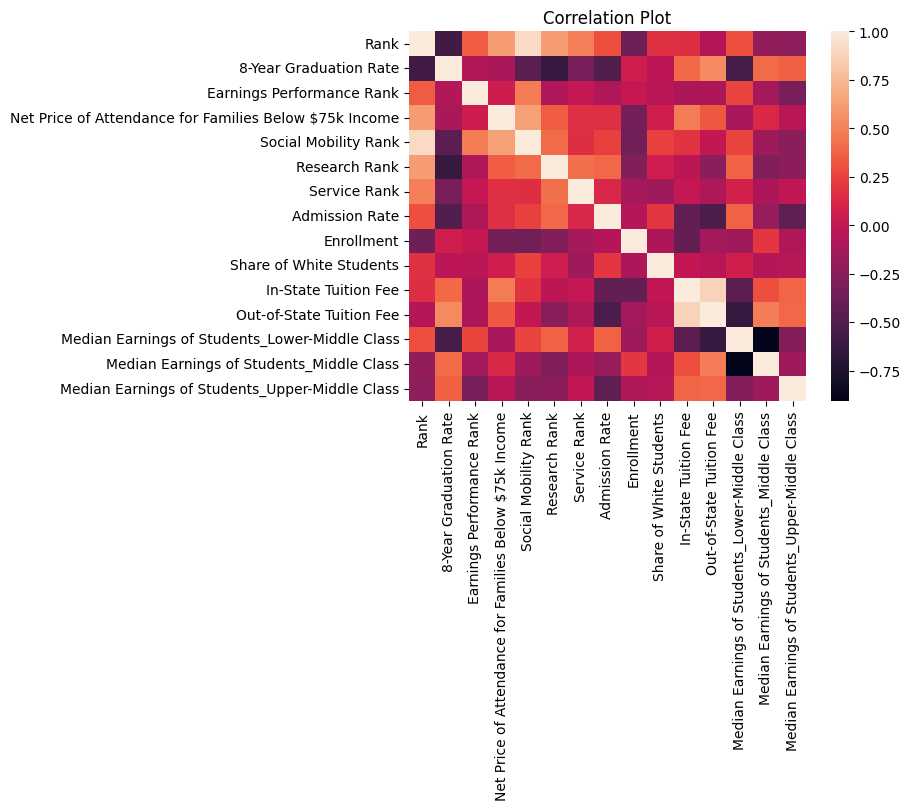

In [14]:
# Encode string variables
colleges_encoded = pd.get_dummies(colleges)
correlation_matrix = colleges_encoded.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix)
plt.title('Correlation Plot')
plt.show()

Features in the data set

In [15]:
colleges.columns

Index(['Rank', '8-Year Graduation Rate', 'Earnings Performance Rank',
       'Net Price of Attendance for Families Below $75k Income',
       'Social Mobility Rank', 'Research Rank', 'Service Rank',
       'Admission Rate', 'Enrollment', 'Share of White Students',
       'In-State Tuition Fee', 'Out-of-State Tuition Fee',
       'Median Earnings of Students'],
      dtype='object')

How much data do we have?

In [16]:
colleges.shape

(353, 13)

Data types in the data set

In [17]:
colleges.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353 entries, 0 to 441
Data columns (total 13 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Rank                                                    353 non-null    int64  
 1   8-Year Graduation Rate                                  353 non-null    float64
 2   Earnings Performance Rank                               353 non-null    int64  
 3   Net Price of Attendance for Families Below $75k Income  353 non-null    int64  
 4   Social Mobility Rank                                    353 non-null    int64  
 5   Research Rank                                           353 non-null    int64  
 6   Service Rank                                            353 non-null    int64  
 7   Admission Rate                                          353 non-null    float64
 8   Enrollment                                   

In [18]:
colleges['Median Earnings of Students']

0      Upper-Middle Class
1      Upper-Middle Class
3      Lower-Middle Class
4      Upper-Middle Class
5      Upper-Middle Class
              ...        
434    Lower-Middle Class
437    Lower-Middle Class
438    Lower-Middle Class
439    Lower-Middle Class
441    Lower-Middle Class
Name: Median Earnings of Students, Length: 353, dtype: object

In [19]:
# Count the number of value Median Earnings of Students
colleges['Median Earnings of Students'].value_counts()

Median Earnings of Students
Lower-Middle Class    214
Middle Class          123
Upper-Middle Class     16
Name: count, dtype: int64

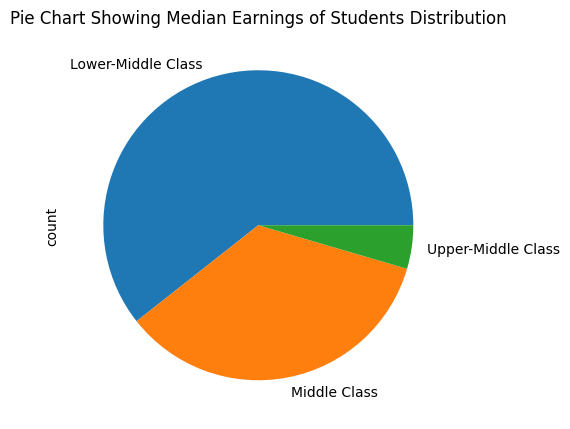

In [20]:
# Visualize the distribution of Median Earnings of Students Pie Chart
data = colleges['Median Earnings of Students'].value_counts()
plt.figure(figsize=(5,10))
data.plot.pie(title='Pie Chart Showing Median Earnings of Students Distribution')
plt.show()

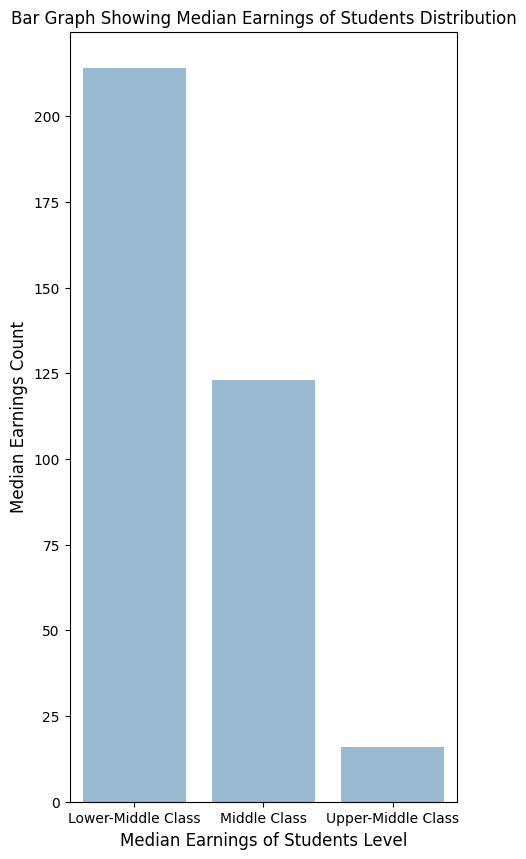

In [21]:
# Visualize the distribution of Median Earnings of Students Bar Graph
data = colleges['Median Earnings of Students'].value_counts()
plt.figure(figsize=(5,10))
sns.barplot(x = data.index, y = data.values, alpha = 0.5)
plt.title('Bar Graph Showing Median Earnings of Students Distribution')
plt.ylabel('Median Earnings Count', fontsize = 12)
plt.xlabel('Median Earnings of Students Level', fontsize = 12)
plt.show()

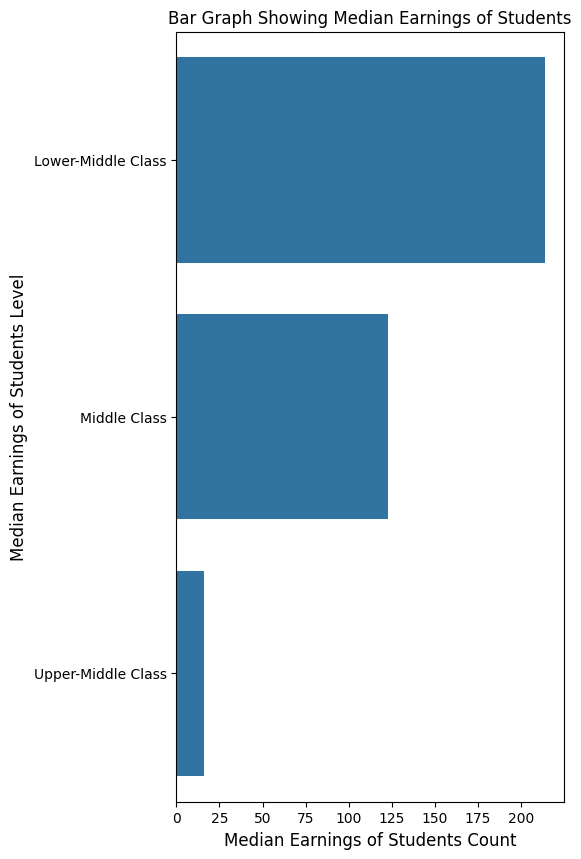

In [22]:
# Visualize the distribution of Median Earnings of Studentst Bar Graph Horizontally
data = colleges['Median Earnings of Students'].value_counts()
plt.figure(figsize=(5,10))
sns.barplot(x = data.values, y = data.index, alpha = 1, orient = 'h')
plt.title('Bar Graph Showing Median Earnings of Students')
plt.ylabel('Median Earnings of Students Level', fontsize = 12)
plt.xlabel('Median Earnings of Students Count', fontsize = 12)
plt.show()

One-hot encoding for categorical values

In [23]:
#enrollment_encoding = pd.get_dummies(colleges['Enrollment'])

In [24]:
# Encoded fuel type
#enrollment_encoding

In [25]:
# Encode multiple columns at once
# encoder = OneHotEncorder(sparse = False, drop'first') # Drop #first is equivalent to drop_first=True in get_dummies

# Select categorical columns for encoding
# categorical_columns = []
# colleges_categorical = colleges[categorical_columns]

# Fit and transform the data
# colleges_encoded = encoded.fit_transform(colleges_categorical)

# Convert the output to a DataFrame
# columns = encoder.get_feature_names_out(categorical_columns)
# colleges_encoded_df = pd.DataFrame(colleges_encoded,columns_columns)

# Drop original categorical columns and join the encoded DataFrame
# colleges = colleges.drop(categorical_columns, axis=1)

In [26]:
# Ordinal Encoding

# Create a dictionary to map categorical values to numerical values
# type_map = {'':1, '':2, '':3}
# Replace categorical values with numerical values
# colleges[''] = colleges[''].replace(type_map)

Drop original Enrollment Column for hot-encoded Enrollment Column

In [27]:
#colleges = colleges.drop('Enrollment', axis = 1)

In [28]:
#colleges

In [29]:
#colleges = colleges.join(enrollment_encoding)

In [30]:
#colleges

Data without categorization of Enrollment

In [31]:
colleges_model

,Rank,8-Year Graduation Rate,Earnings Performance Rank,Net Price of Attendance for Families Below $75k Income,Social Mobility Rank,Research Rank,Service Rank,Admission Rate,Enrollment,Share of White Students,In-State Tuition Fee,Out-of-State Tuition Fee,Median Earnings of Students
0,1,0.98,87,1758,15,3,19,0.0401,7938.0,0.3634,55587.0,55587.0,95114.0
1,2,0.96,11,355,6,2,169,0.0395,7645.0,0.2798,56169.0,56169.0,106987.0
3,4,0.97,1,3722,2,9,73,0.5827,395.0,0.8000,27200.0,27200.0,38264.0
4,5,0.98,7,4618,5,5,138,0.0438,5236.0,0.3850,56010.0,56010.0,110433.0
5,6,0.95,59,3068,23,15,8,0.0589,6815.0,0.4001,60244.0,60244.0,97418.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,435,0.63,355,25956,431,240,370,0.7011,3131.0,0.6340,39350.0,39350.0,51336.0
437,438,0.47,290,25220,432,431,419,0.9894,10106.0,0.6685,8289.0,20767.0,43810.0
438,439,0.51,371,22502,433,417,430,0.7086,1797.0,0.1013,32940.0,32940.0,55391.0
439,440,0.53,280,24913,438,365,423,0.6698,1338.0,0.6278,28870.0,28870.0,53478.0


Seperate into Features (X) and Targets (Y)

In [32]:
Y = colleges_model['Median Earnings of Students']
X = colleges_model.drop(['Rank', 'Earnings Performance Rank', 'Social Mobility Rank', 'Research Rank', 'Service Rank','Median Earnings of Students','Net Price of Attendance for Families Below $75k Income'], axis=1)

Looking at Features and Label

In [33]:
X

,8-Year Graduation Rate,Admission Rate,Enrollment,Share of White Students,In-State Tuition Fee,Out-of-State Tuition Fee
0,0.98,0.0401,7938.0,0.3634,55587.0,55587.0
1,0.96,0.0395,7645.0,0.2798,56169.0,56169.0
3,0.97,0.5827,395.0,0.8000,27200.0,27200.0
4,0.98,0.0438,5236.0,0.3850,56010.0,56010.0
5,0.95,0.0589,6815.0,0.4001,60244.0,60244.0
...,...,...,...,...,...,...
434,0.63,0.7011,3131.0,0.6340,39350.0,39350.0
437,0.47,0.9894,10106.0,0.6685,8289.0,20767.0
438,0.51,0.7086,1797.0,0.1013,32940.0,32940.0
439,0.53,0.6698,1338.0,0.6278,28870.0,28870.0


In [34]:
Y

0       95114.0
1      106987.0
3       38264.0
4      110433.0
5       97418.0
         ...   
434     51336.0
437     43810.0
438     55391.0
439     53478.0
441     47825.0
Name: Median Earnings of Students, Length: 353, dtype: float64

Split data into training and testing sets in 70/30

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 2)

Create model and fit (train) with the training data

In [36]:
from sklearn.linear_model import LinearRegression

# Load the linear regression model
LR = LinearRegression()

LR.fit(X_train, Y_train)

LinearRegression()

Make Predictionson the test data

In [37]:
# Model Evaluation
# Test Model on Test Data

y_pred = LR.predict(X_test)

Calculating the Coefficients

In [38]:
coefficients = LR.coef_

print(f'Coefficients: {coefficients}')

Coefficients: [ 3.89375540e+04 -2.58741294e+03  1.23915792e-01 -2.00772083e+03
 -1.11926420e-02  6.24170223e-01]


Calculate the Intercept

In [39]:
intercept = LR.intercept_
print(f'Intercept: {intercept}')

Intercept: 15103.855593466593


Calculate R-Squared

In [40]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred)
print(f'R2: {r2}')

R2: 0.6002920653525887


Calculate MSE

In [41]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, y_pred)
print(f'MSE: {mse}')

MSE: 85258760.36300749


Calculate RMSE

In [42]:
rmse = mean_squared_error(Y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 9233.567044377134


Calculate MAE

In [43]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test, y_pred)
print(f'MAE: {mae}')

MAE: 6737.924862058813


In [44]:
# Predictions made based on test data
# Negative values mean the model is not perfect
y_pred

array([61533.40120879, 81702.45072708, 57233.09877229, 66653.90525698,
       78924.57989159, 60965.58885467, 40356.53203424, 68953.76286256,
       65710.33916458, 61238.66654093, 53316.31130837, 40398.87510986,
       66674.39117001, 57991.97028962, 37802.93627485, 60623.43324887,
       64209.46161756, 71227.85014299, 40612.58719786, 49616.69587589,
       57934.66431182, 68838.70964778, 50609.72495749, 49075.60531222,
       50435.44951704, 42660.62741698, 77075.06849781, 68715.4290676 ,
       51338.70589014, 48227.14758015, 48938.35849959, 73375.29968854,
       43000.63828251, 86743.57405062, 84353.47033086, 58129.78415896,
       44269.66057817, 44827.10955733, 62684.35632919, 45413.01901425,
       87358.0546641 , 56273.32066663, 50834.35737694, 54732.89405462,
       53642.9217715 , 60038.27505517, 55452.82141806, 61969.18415634,
       43116.72801207, 65660.6467086 , 56828.78124839, 67616.08536734,
       86099.22250212, 55673.49071964, 61113.13571741, 85096.5815063 ,
      

Export the Model as Pickle

In [45]:
import pickle

with open('median_earnings.pkl', 'wb') as f:
  pickle.dump(LR, f)